# Fire fighting Problem (FFP)

# 1. Creating a tree graph called g1

In [1]:
import igraph as igraph
from igraph import * 
g1 = Graph()

import igraph as ig
g1 = ig.Graph(edges=[[0, 1], [0, 2],[0, 3],[0, 4],[0, 5],[0, 6],[1, 2],[2, 3],[3, 4],[4, 5],[5, 6],[1, 12],[12, 13],[2, 12], [3, 12], [4, 12],
                    [5,12], [12,6],[6, 14], [7, 14], [8, 14],[9, 14],[10, 14],[11, 14]] )

## Call the graph g1

In [5]:
print (g1) # number 15 is the number of vertices and number 23 is the number of edges
          # 0--1 shows vertex 0 is adjacent to vertex 1, root = 0

IGRAPH U--- 15 24 --
+ edges:
 0 --  1  2  3  4  5  6       6 --  0  5 12 14            12 --  1  2  3  4  5
6 13
 1 --  0  2 12                7 -- 14                     13 -- 12
 2 --  0  1  3 12             8 -- 14                     14 --  6  7  8  9 10
11
 3 --  0  2  4 12             9 -- 14
 4 --  0  3  5 12            10 -- 14
 5 --  0  4  6 12            11 -- 14


## Visualization of the graph g1

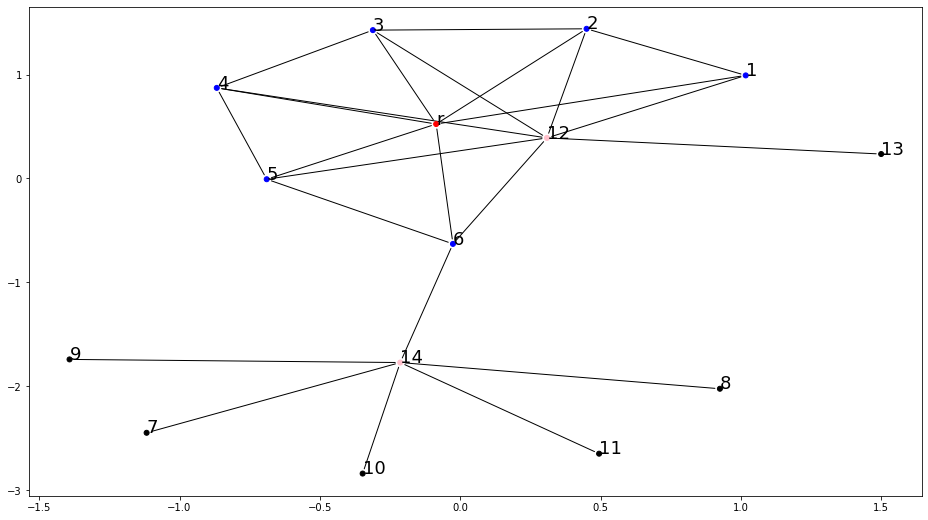

In [6]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(16, 9)) 
g1.vs
igraph.plot(g1, bbox=(400, 400), target=ax, vertex_label_size=18, vertex_label_dist=20, edge_arrow_size=30,
vertex_color=['red', 'blue', 'blue', 'blue', 'blue', 'blue','blue','none', 'none','none','none',
              'none','pink','none','pink'], 
            vertex_label=['r','1','2','3','4','5','6','7','8','9','10','11','12','13','14'])
# r colored red is where fire starts

# 2. Creating a tree graph g2

In [7]:
import igraph as igraph
from igraph import * 
g2 = Graph()

import igraph as ig
g2 = ig.Graph(edges=[[1, 0], [0, 3], [4, 0], [1, 2], [1, 5], [3,7], [2, 3], [2, 6], [7, 4], [4, 5], [6, 5], [6,7]])

## Call the graph g2

In [8]:
print (g2)

IGRAPH U--- 8 12 --
+ edges:
0 -- 1 3 4   2 -- 1 3 6   4 -- 0 5 7   6 -- 2 5 7
1 -- 0 2 5   3 -- 0 2 7   5 -- 1 4 6   7 -- 3 4 6


## Visualization of the graph g2

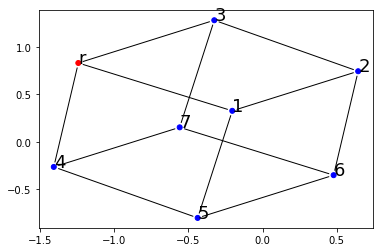

In [9]:
 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
igraph.plot(g2, target=ax, vertex_color=['red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'], 
            vertex_label_size=18, vertex_label_dist=20, vertex_label=['r','1','2','3','4','5','6','7'])

# 3. Creating a tree graph called g3

In [10]:
import igraph as igraph
from igraph import * 
g3 = Graph()

import igraph as ig
g3 = ig.Graph(edges=[[1, 0], [0, 2], [0, 3], [1, 4], [4,5], [4, 7], [2, 6], [3, 8], [9, 8], [10, 8], [11, 8]])


# Call the graph g3

In [11]:
print(g3)

IGRAPH U--- 12 11 --
+ edges:
0--1 0--2 0--3 1--4 4--5 4--7 2--6 3--8 8--9 8--10 8--11


## Visualization of the graph g3

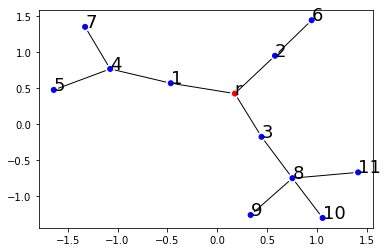

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
vNum=12 # the number of vertices
igraph.plot(g3, target=ax, vertex_color=["red"]+["blue"]*(vNum-1), 
            vertex_label_size=18, vertex_label_dist=20, vertex_label=['r']+list(range(1,vNum)))

# Define FF strategy function using "Greedy algorithm"

In [13]:
 ################################## First, we define The greedy algorithm ####################################

import random

def the_greedy(g, burnt_candidates, totalBurnt): 
    v_maxDegree = set() 
    maxDegree = 0                     
  

    for v in burnt_candidates: 
        if (g.vs[v].degree()) > maxDegree:
            maxDegree = g.vs[v].degree()
            v_maxDegree.clear()
            v_maxDegree.add(v)
        elif (g.vs[v].degree()) == maxDegree:
            v_maxDegree.add(v)

    return set([random.choice(list(v_maxDegree))])

  
################################# Second, we define The greedy optimized #######################################


def the_greedy_optimized(g, burnt_candidates, totalBurnt): 

    v_maxDegree = set() 
    maxDegree = 0                     
  
    for v in burnt_candidates:
        neighbor = set(g.neighbors(v))
        desiredDegree = len(neighbor.difference(totalBurnt).difference(burnt_candidates))
        if (desiredDegree > maxDegree):
            maxDegree = desiredDegree
            v_maxDegree.clear()
            v_maxDegree.add(v)
        elif (desiredDegree == maxDegree):
            v_maxDegree.add(v)
            
    if (len(v_maxDegree) == 1): 
        return v_maxDegree

    return set([random.choice(list(v_maxDegree))])

############################# Third, we define fire function to examine both algorithms ##########################

def fire(g, root, greedy):
    totalBurnt = set([root])
    burning_candidates = set()
    root=set([root])
    protected = set()
    i = 0
    
    while(len(root) != 0): 
        
        for j in root:
            neighbors= g.neighbors(j) # find neighbors of root
            neighbors = set(neighbors).difference(totalBurnt).difference(root).difference(protected)
            burning_candidates.update(neighbors)

#       if(i==0):
#           print(f"round={i}, r= {root}") 

        if (len(burning_candidates) ==0 ):
            break

    
        v_protected=greedy(g, burning_candidates, totalBurnt)        
        protected.update(v_protected)

        root = burning_candidates.difference(protected)
        totalBurnt.update(root)

        
#       if(i==0): 
#           print(f"round={i}, Burning candidate vertices= {burning_candidates},", f"Protected Vertex = {v_protected}")  # in round zero introduce root
            
#       else:
#           print(f"round={i}, Burning candidate vertices= {burning_candidates},", f"Protected Vertex = {v_protected}")
           
        burning_candidates.clear()
        
        i += 1
      
    
############################### Forth, we print the damage causes by a vertex #################################
    
    ratio= round((len(totalBurnt)/len(g.vs))*100, 1) 
    
    return totalBurnt, protected, ratio




## Calling ratio of damage on graphs g1, g2, and g3


### One vertex outcomes on g1

In [14]:
n= [len(g1.vs)]
print("The number of vertices: ",n)  


totalBurnt, protected, ratio = fire(g1,0, the_greedy_optimized)  # root is 0 in more complecated graph g1
print(f"Total burnt vertices: {totalBurnt}, Protected vertices: {protected}, and Damage: {ratio}%")

The number of vertices:  [15]
Total burnt vertices: {0, 1, 2, 3, 4, 5}, Protected vertices: {12, 6}, and Damage: 40.0%


### One vertex outcomes on g2

In [15]:
n= [len(g2.vs)]
print("The number of vertices: ",n) 


totalBurnt, protected, ratio = fire(g2,0, the_greedy_optimized)  # root is 0 in cubic graph g2
print(f"Total burnt vertices: {totalBurnt}, Protected vertices: {protected}, and Damage: {ratio}%")

The number of vertices:  [8]
Total burnt vertices: {0, 1, 2, 3, 7}, Protected vertices: {4, 5, 6}, and Damage: 62.5%


### One vertex outcomes on g3

In [16]:
n= [len(g3.vs)]
print("The number of vertices: ",n) 


totalBurnt, protected, ratio = fire(g2,0, the_greedy_optimized)  # root is 0 in a tree
print(f"Total burnt vertices: {totalBurnt}, Protected vertices: {protected}, and Damage: {ratio}%")

The number of vertices:  [12]
Total burnt vertices: {0, 2, 3, 4, 7}, Protected vertices: {1, 5, 6}, and Damage: 62.5%


# Average highest damage using "The greedy alg" with  iterations

In [17]:
def maxDamage(g, the_greedy, iteration):
    
    listMDVertices=[]
    listMD=[]
    
    for i in range(iteration):
        
        damages_result = []
        vertecies = range(len(g.vs))
        listMaxDamagedVertecies = []
        maxDamage = 0
        
        for v in vertecies:
            totalBurnt, protected, ratio = fire(g, v, the_greedy) 
            damages_result.append([totalBurnt, protected, ratio])

            if (ratio > maxDamage):
                maxDamage = ratio
                listMaxDamagedVertecies.clear()
                listMaxDamagedVertecies.append(v)

            elif (ratio == maxDamage):
                listMaxDamagedVertecies.append(v)
                
        listMDVertices.append(listMaxDamagedVertecies) 
        listMD.append(maxDamage)
        
    return  listMDVertices,listMD  

## Results for graphs g1, g2, g3 with 5 iterations

### g1

In [18]:
result = maxDamage(g1, the_greedy, 5) # g1 is a graph
print(result)
print("")
print(f" The average max damage =  {sum(result[1])/len(result[1])}")

([[6], [6, 12], [6], [6, 12], [6]], [80.0, 80.0, 80.0, 80.0, 80.0])

 The average max damage =  80.0


In [19]:
result = maxDamage(g1, the_greedy_optimized, 5) # g1 is a graph
print(result)
print("")
print(f" The average max damage =  {sum(result[1])/len(result[1])}")

([[6], [6], [6], [6], [6]], [80.0, 80.0, 53.3, 53.3, 80.0])

 The average max damage =  69.32000000000001


### g2

In [20]:
result = maxDamage(g2, the_greedy, 5) # g2 is a quibic graph
print(result)
print("")
print(f" The average max damage =  {sum(result[1])/len(result[1])}")

([[0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7]], [62.5, 62.5, 62.5, 62.5, 62.5])

 The average max damage =  62.5


In [21]:
result = maxDamage(g2, the_greedy_optimized, 5) # g2 is a quibic graph
print(result)
print("")
print(f" The average max damage =  {sum(result[1])/len(result[1])}")

([[0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7]], [62.5, 62.5, 62.5, 62.5, 62.5])

 The average max damage =  62.5


### g3

In [22]:
result = maxDamage(g3, the_greedy, 5) # g3 is a graph
print(result)
print("")
print(f" The average max damage =  {sum(result[1])/len(result[1])}")

([[0, 8], [0, 8], [0, 8], [0], [0, 8]], [33.3, 33.3, 33.3, 41.7, 33.3])

 The average max damage =  34.98


In [23]:
result = maxDamage(g3, the_greedy_optimized, 5) # g3 is a graph
print(result)
print("")
print(f" The average max damage =  {sum(result[1])/len(result[1])}")

([[0, 8], [0, 8], [0], [0, 8], [0, 8]], [33.3, 33.3, 41.7, 33.3, 33.3])

 The average max damage =  34.98


# Root examination

## Define a function to choose a root randomly from "The greedy optimized algorithm"

In [24]:
import random

def calling_fire_random(g):
    
    v = random.choice([v.index for v in g.vs])
    totalBurnt, protected, ratio = fire(g,v, the_greedy_optimized)
    print(f"Total burnt vertices: {totalBurnt}, Protected vertices: {protected}, and Damage: {ratio}%")

### Calling the function to choose a roots randomly on graphs g1, g2, g3

In [25]:
calling_fire_random(g1)

Total burnt vertices: {0, 1, 2, 3, 4, 5}, Protected vertices: {12, 6}, and Damage: 40.0%


In [26]:
calling_fire_random(g2)

Total burnt vertices: {0, 3, 4, 6, 7}, Protected vertices: {1, 2, 5}, and Damage: 62.5%


In [27]:
calling_fire_random(g3)

Total burnt vertices: {1, 4, 5}, Protected vertices: {0, 7}, and Damage: 25.0%


In [28]:
# FUTURE WORK:

# 0. Write greedy algorithm, and optimize it. visulization of some graphs and 
#.   fix an error exists on the_optimized_greedy function (done)

# 1. fix the_greedy function (done)

# 2. define a function called fire_calling_random (done) 

# 3. find the worse vertex with the max total burnt ( a vertex with the highest damage) (done)

# 4. there is an error in random function (done)

# 5. try classes of graphs or try random graphs to check how algorithms work on different models. 
#    Generate igraph_k_regular, igraph_forest_fire, and igraph_growing_random.(done)

# 6. trying to find a trend in random examination using plots (done)

# 7.1 find whether k_regular is random by generating the same graph then generating table and plot. (done)
#     generate 4 regular graph up to 10 and check isomorphism and check labels or vertices sequence.
# 7.2 trying not to fix a vertex for plot and check graphs are random, and working on visualization.(done)
# 7.3 download text file form networkrepository.com and write a python code for it. try network in igraph. (done)   

# 8.1 create a table in which rows show different graphs from netwok repository and columns shows different 
#     algorithms (done)
# 8.2 generate seed for the other random graphs(done) 
# 8.3 orgenize Jupyter(done)

#  9.1 Create a big graph Danny suggested (done)
#  9.2 write a code to call function rather than copying(done)
#  9.3 simplified graphs from networkrepository(done)

In [ ]:
#   One thought for optimization of the greedy optimized
#   in some parts, the algorithm should make some decisions to see if  there is small cut set
#   (connectivity check or looking at the way fire spread or distance), in the other
#   part, it can do the same it was

#     It might be a good to find graph density which is D= 2|e|/|v|(|v|-1) in k_regular graphs
#     Dense(sparse) graph is a graph in which the number of edges is close to the maximal(minimal) number of edges
#     If D==0, then graph is sparse like empty graphs(a graph with no edges)
#     If D<1/2, then graph is sparse and if D>1/2, then graph is dense
#     In complete graphs,D==1

In [29]:
# lemma: there is no point to consider a pendant as a place to put firefighter, unless 
# only there is no vertex other than pendant remaining.